<a href="https://colab.research.google.com/github/keshavvprabhu/python-tutorials/blob/main/HotelReservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [56]:
df = pd.read_csv("hotel_bookings 2.csv")
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
42316,City Hotel,0,22,2015,September,36,4,1,2,2,...,No Deposit,7.0,NaN,0,Transient,76.81,0,0,Check-Out,7/9/2015
110251,City Hotel,0,129,2017,April,16,22,1,1,2,...,No Deposit,9.0,NaN,0,Transient,130.50,0,2,Check-Out,24/4/2017
63745,City Hotel,1,32,2017,February,8,20,1,1,1,...,Non Refund,NaN,NaN,0,Transient,75.00,0,0,Canceled,19/1/2017
64955,City Hotel,1,56,2017,March,12,21,0,3,2,...,Non Refund,86.0,NaN,0,Transient,85.00,0,0,Canceled,24/1/2017
58260,City Hotel,0,298,2016,October,42,9,2,5,2,...,No Deposit,7.0,NaN,0,Transient,79.59,0,1,Check-Out,16/10/2016


In [57]:
df.shape

(119390, 32)

In [58]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [60]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [61]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [62]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print()

hotel
['Resort Hotel' 'City Hotel']

arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal
['BB' 'FB' 'HB' 'SC' 'Undefined']

country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 

In [63]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [64]:
df.drop(['company', 'agent'], axis=1, inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118897.0,0.371347,0.483167,0.00,0.0,0.0,1.0,1.0
lead_time,118897.0,104.312018,106.903570,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118897.0,2016.157657,0.707462,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118897.0,27.166674,13.589966,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118897.0,15.800802,8.780321,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118897.0,0.928905,0.996217,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118897.0,2.502157,1.900171,0.00,1.0,2.0,3.0,41.0
adults,118897.0,1.858390,0.578578,0.00,2.0,2.0,2.0,55.0
children,118897.0,0.104208,0.399174,0.00,0.0,0.0,0.0,10.0
babies,118897.0,0.007948,0.097381,0.00,0.0,0.0,0.0,10.0


<Axes: >

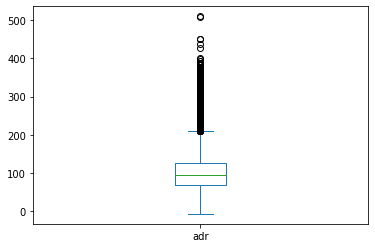

In [70]:
df['adr'].plot(kind='box')

In [71]:
df = df[df['adr'] < 5000]

<Axes: >

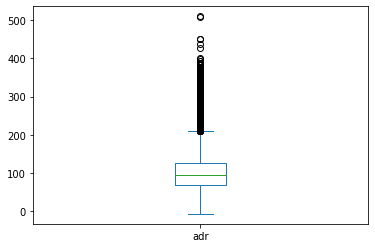

In [72]:
df['adr'].plot(kind='box')

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


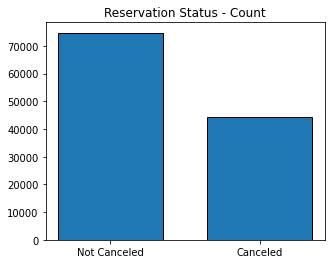

In [78]:
cancelled_percentage = df['is_canceled'].value_counts(normalize=True)
print(cancelled_percentage)

plt.figure(figsize=(5,4))
plt.title('Reservation Status - Count')
plt.bar(['Not Canceled', 'Canceled'], df['is_canceled'].value_counts(), edgecolor='k', width=0.7)
plt.show()

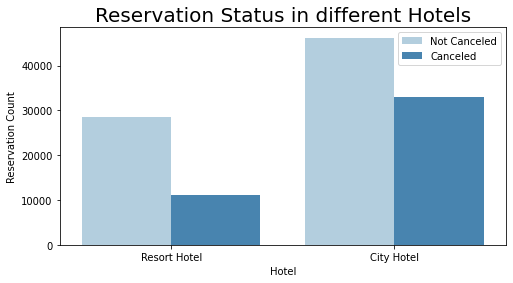

In [82]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data= df, palette='Blues')
legend_labels,_ = ax1.get_legend_handles_labels()
# ax1.legend(bbox_to_anchor(1,1))
plt.title("Reservation Status in different Hotels", size=20)
plt.xlabel("Hotel")
plt.ylabel("Reservation Count")
plt.legend(["Not Canceled", "Canceled"])
plt.show()

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64


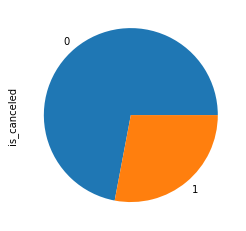

In [92]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
print(resort_hotel['is_canceled'].value_counts(normalize=True))

resort_hotel['is_canceled'].value_counts().plot(kind='pie')
plt.show()

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64


<Axes: ylabel='is_canceled'>

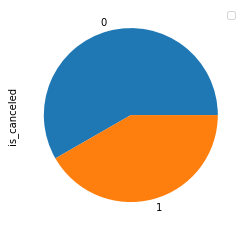

In [93]:
city_hotel = df[df['hotel'] == 'City Hotel']
print(city_hotel['is_canceled'].value_counts(normalize=True))
city_hotel['is_canceled'].value_counts().plot(kind='pie')

In [103]:
resort_hotel_group = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel_group = city_hotel.groupby('reservation_status_date')[['adr']].mean()

In [104]:
resort_hotel_group

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-05,115.363333
2015-01-06,133.677143
2015-01-07,82.485455
...,...
2017-12-05,103.287534
2017-12-06,159.808929
2017-12-07,160.306275


In [105]:
city_hotel_group

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-05,58.900000
2015-01-06,69.216667
2015-01-07,82.877500
...,...
2017-12-04,128.755465
2017-12-05,124.544536
2017-12-06,132.725882


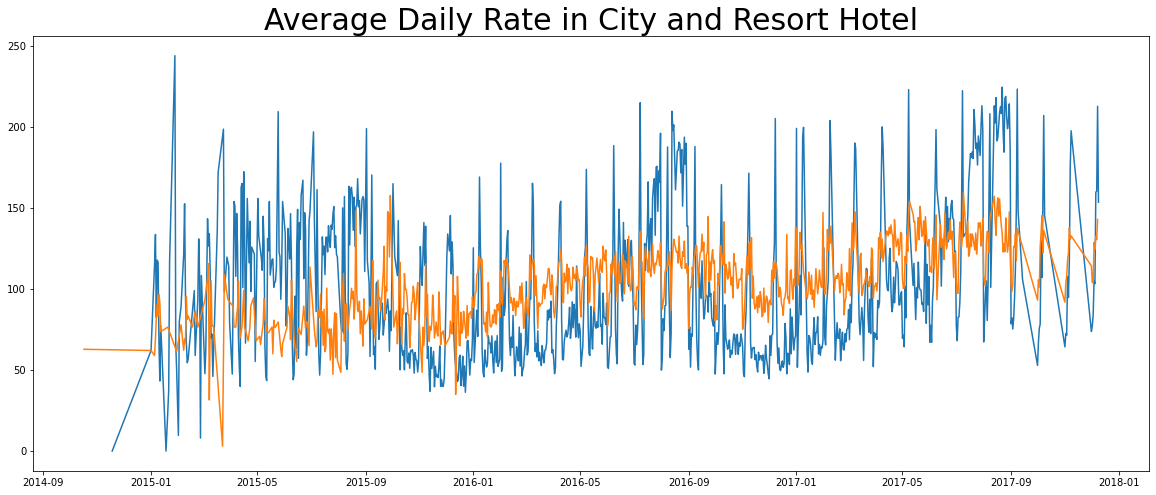

In [106]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate in City and Resort Hotel", fontsize=30)
plt.plot(resort_hotel_group.index, resort_hotel_group['adr'], label='Resort Hotel')
plt.plot(city_hotel_group.index, city_hotel_group['adr'], label='City Hotel')

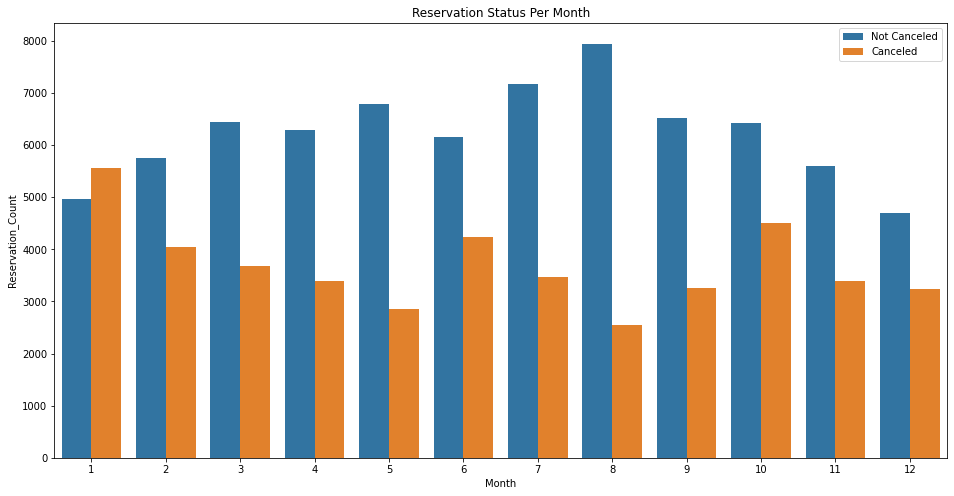

In [108]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x='month', hue='is_canceled', data= df)
plt.title("Reservation Status Per Month")
plt.xlabel("Month")
plt.ylabel("Reservation_Count")
plt.legend(['Not Canceled','Canceled'])
plt.show()

             adr
month           
1      532660.54
2      399081.98
3      419319.79
4      399361.20
5      343229.69
6      468827.36
7      387597.85
8      296665.40
9      340233.39
10     384742.47
11     331389.62
12     329229.60


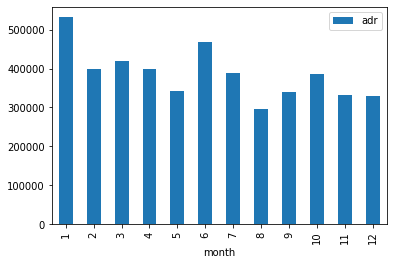

In [132]:
datas = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index().set_index('month')
datas.plot(kind='bar')
print(datas)


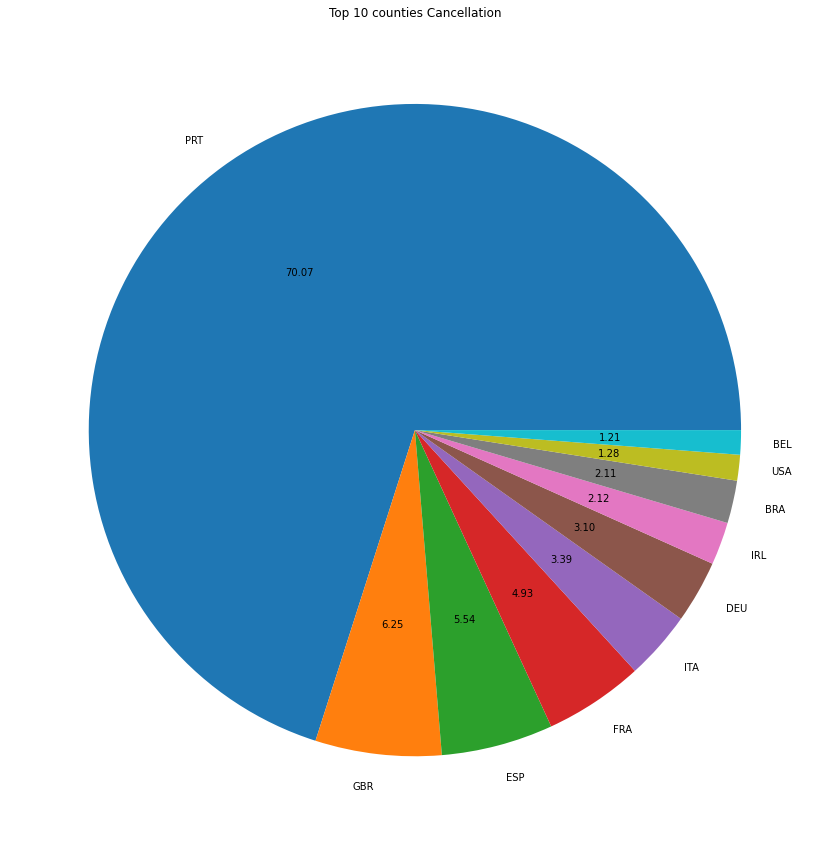

In [136]:
plt.figure(figsize=(15,15))
cancelled_data = df[df['is_canceled']== 1]
top10_cancellation_country = cancelled_data['country'].value_counts()[:10]
plt.title("Top 10 counties Cancellation")
plt.pie(top10_cancellation_country, autopct="%.2f", labels= top10_cancellation_country.index)
plt.show()

In [138]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [137]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [139]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64